In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import os
import warnings
import datetime
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline

In [8]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

In [9]:
print(features.shape)
print(stores.shape)
print(train.shape)
#print(test.shape)

(8190, 12)
(45, 3)
(421570, 5)


# Merging & Cleaning

**Merging train & stores**

In [10]:
combined_train = pd.merge(train, stores, how = 'left', on = 'Store')
#combined_test = pd.merge(test, stores, how = 'left', on = 'Store')

**Merging above table with features**

In [11]:
combined_train = pd.merge(combined_train, features, how = 'inner', on = ['Store', 'Date'])
#combined_test = pd.merge(combined_test, features, how = 'inner', on = ['Store', 'Date'])

**Check for Null Values**

In [12]:
combined_train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

**Fill Null Values with 0's**

In [13]:
combined_train.fillna(0, inplace = True)

In [14]:
combined_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

**Removing duplicate columns**

In [15]:
combined_train.drop(['IsHoliday_y'], axis = 1, inplace = True)
combined_train.rename(columns = {'IsHoliday_x': 'IsHoliday'}, inplace = True)

In [16]:
combined_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


In [17]:
data_eda = combined_train.copy(deep = True)
data_eda.to_csv('data_eda.csv')

# Exploratory Data Analysis

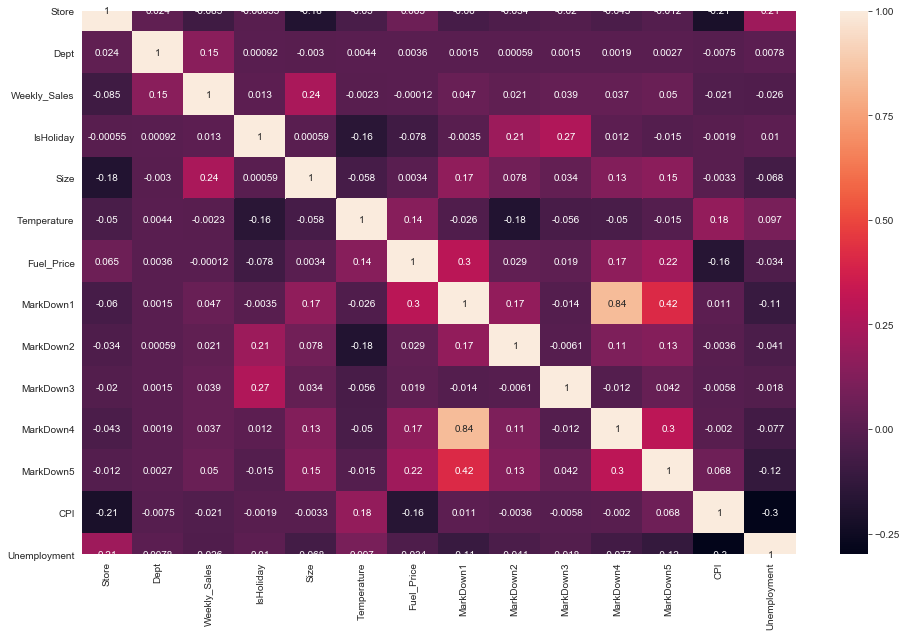

In [18]:
corr = data_eda.corr()
plt.subplots(figsize=(16,10))
sns.heatmap(corr, annot=True)

In [19]:
corr['Weekly_Sales'].sort_values(ascending=False)[:40]

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown2       0.020716
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'The relationship of Stores and Weekly Sales')

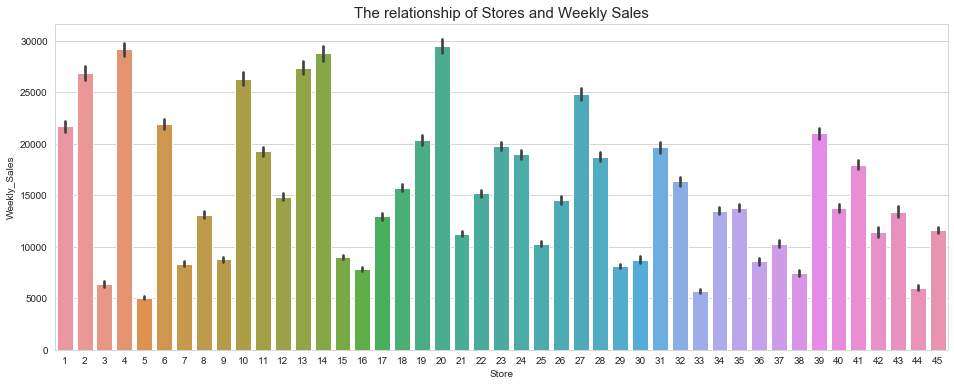

In [20]:
plt.figure(figsize=(16, 6))
sns.barplot(data_eda.Store, data_eda.Weekly_Sales)
plt.title('The relationship of Stores and Weekly Sales', fontsize = 15)

Text(0, 0.5, 'Weekly Sales')

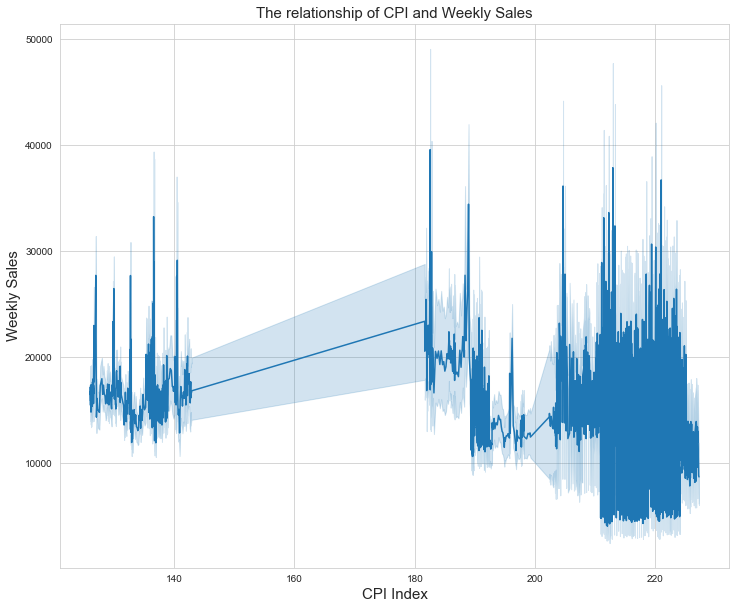

In [21]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')

ax1 = sns.lineplot(x = 'CPI', y = 'Weekly_Sales', data = data_eda, palette = 'mako')
plt.title('The relationship of CPI and Weekly Sales', fontsize = 15)
plt.xlabel('CPI Index', fontsize = 15)
plt.ylabel('Weekly Sales', fontsize = 15)

Text(-12.449999999999996, 0.5, 'Weekly Sales')

<Figure size 1152x432 with 0 Axes>

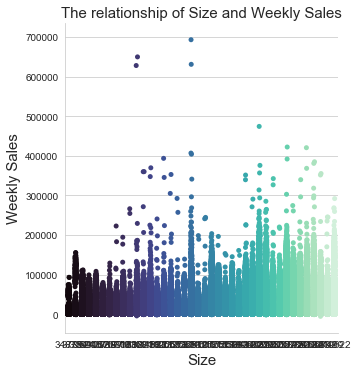

In [22]:
plt.figure(figsize = (16, 6))

sns.set_style('whitegrid')

sns.catplot(x = 'Size', y = 'Weekly_Sales', data = data_eda, palette = 'mako')
plt.title('The relationship of Size and Weekly Sales', fontsize = 15)
plt.xlabel('Size', fontsize = 15)
plt.ylabel('Weekly Sales', fontsize = 15)

Text(0.5, 1.0, 'The relationship of Store Type and Weekly Sales')

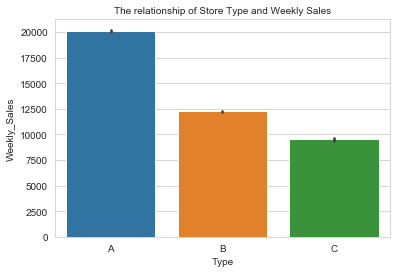

In [23]:
sns.barplot(data_eda.Type, data_eda.Weekly_Sales)
plt.title('The relationship of Store Type and Weekly Sales', fontsize = 10)

[Text(0, 0.5, 'Week Sales'),
 Text(0.5, 0, 'Store Type'),
 Text(0.5, 1.0, 'The relationship of Store Types and Weekly Sales')]

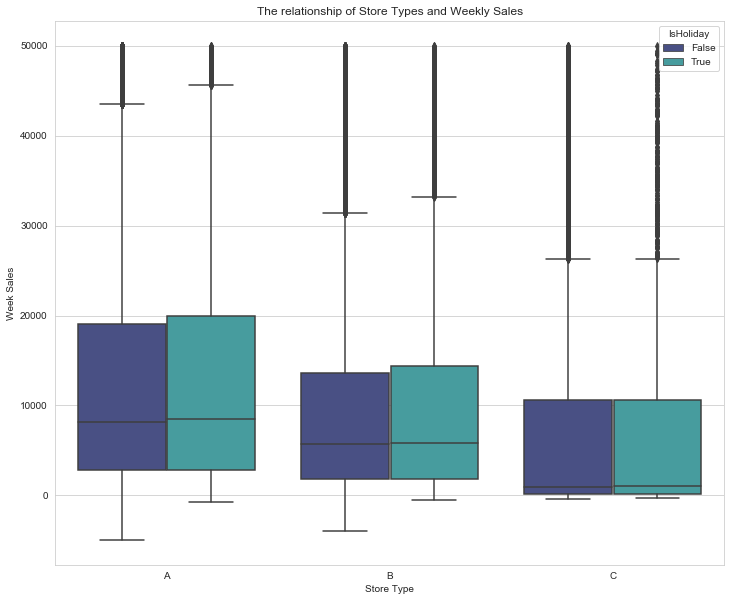

In [24]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')

ax3 = sns.boxplot(y = 'Weekly_Sales', x = 'Type', hue = 'IsHoliday', data = data_eda.loc[data_eda['Weekly_Sales'] < 50000], palette = 'mako')
ax3.set(title = 'The relationship of Store Types and Weekly Sales', xlabel = 'Store Type', ylabel = 'Week Sales')

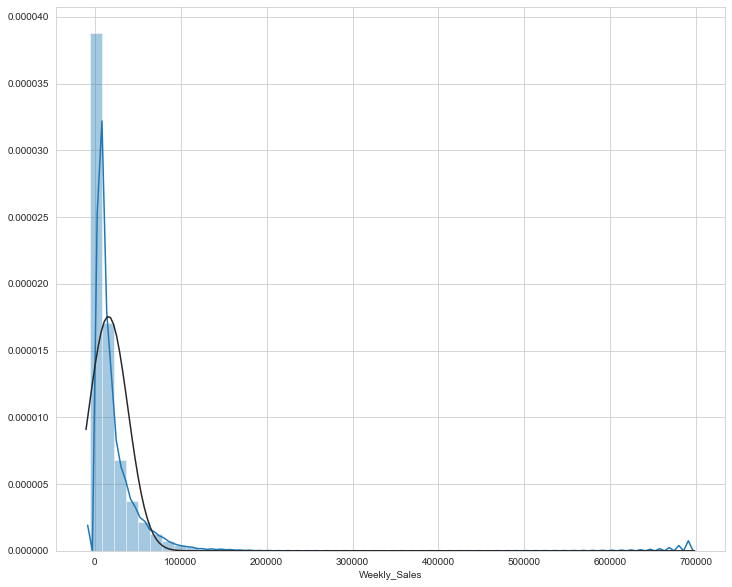

In [25]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')

ax6 = sns.distplot(combined_train.Weekly_Sales, hist = True, fit = norm)

# Data Pre-Processing

In [26]:
combined_train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

**Convert IsHoliday from Boolean to Int**

In [27]:
combined_train.IsHoliday = combined_train.IsHoliday.astype(int)

**Since the date column is not in date time type we will convert it into datetime format**

In [29]:
combined_train['Date'] =pd.to_datetime(combined_train['Date'], format="%Y-%m-%d")

**Aggregation of Department Sales to Store level**

In [30]:
combined_train['Total_Sales'] = combined_train.groupby(by = ["Store","Date"],as_index=False)["Weekly_Sales"].transform(sum)

In [31]:
combined_train = combined_train.drop('Weekly_Sales',axis=1)

In [32]:
combined_train = combined_train.drop_duplicates(subset=['Date','Store'])

In [33]:
combined_train.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Total_Sales
0,1,1,2010-02-05,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1643690.90
73,1,1,2010-02-12,1,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1641957.44
145,1,1,2010-02-19,0,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1611968.17
218,1,1,2010-02-26,0,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1409727.59
290,1,1,2010-03-05,0,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1554806.68


# Data Prep for SARIMA without additional variables

**Selecting Stores Randomly one from each Store Types A,B & C: 20,3 & 30**

In [34]:
Store20_Prob1 = combined_train[combined_train["Store"]==20]
Store3_Prob1 = combined_train[combined_train["Store"]==3]
Store30_Prob1 = combined_train[combined_train["Store"]==30]

In [35]:
Store20_Prob1= Store20_Prob1.sort_values('Date',ascending=True)
Store3_Prob1= Store3_Prob1.sort_values('Date',ascending=True)
Store30_Prob1= Store30_Prob1.sort_values('Date',ascending=True)

**Export to CSV for modeling in R**

In [36]:
Store20_Prob1.to_csv('Store20_Prob1.csv')
Store3_Prob1.to_csv('Store3_Prob1.csv')
Store30_Prob1.to_csv('Store30_Prob1.csv')

# Data Prep for SARIMA with additional variables

In [37]:
data_model_train = combined_train.copy(deep = True)

**Split date into day, month & year & drop Date column**

In [38]:
data_model_train["day"] = [t.dayofweek for t in pd.DatetimeIndex(data_model_train.Date)]
data_model_train["month"] = [t.month for t in pd.DatetimeIndex(data_model_train.Date)]
data_model_train['year'] = [t.year for t in pd.DatetimeIndex(data_model_train.Date)]

**One hot encoding for Categorical variable 'Type'**

In [39]:
data_model_train= pd.get_dummies(data_model_train,drop_first=True)

In [40]:
data_model_train = data_model_train.drop(['Dept','Size'],axis=1)

In [41]:
data_model_train.head()

,Store,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Total_Sales,day,month,year,Type_B,Type_C
0,1,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1643690.90,4,2,2010,0,0
73,1,2010-02-12,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1641957.44,4,2,2010,0,0
145,1,2010-02-19,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1611968.17,4,2,2010,0,0
218,1,2010-02-26,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1409727.59,4,2,2010,0,0
290,1,2010-03-05,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1554806.68,4,3,2010,0,0


In [42]:
data_model_train.shape

(6435, 18)

In [43]:
Store20_Prob2 = data_model_train[data_model_train["Store"]==20]
Store3_Prob2 = data_model_train[data_model_train["Store"]==3]
Store30_Prob2 = data_model_train[data_model_train["Store"]==30]

In [44]:
Store20_Prob2= Store20_Prob2.sort_values('Date',ascending=True)
Store3_Prob2= Store3_Prob2.sort_values('Date',ascending=True)
Store30_Prob2= Store30_Prob2.sort_values('Date',ascending=True)

**Export to CSV for modeling in R**

In [46]:
Store20_Prob2.to_csv('Store20_Prob2.csv')

In [47]:
Store3_Prob2.to_csv('Store3_Prob2.csv')

In [48]:
Store30_Prob2.to_csv('Store30_Prob2.csv')

In [49]:
print(Store3_Prob2.shape)
print(Store20_Prob2.shape)
print(Store30_Prob2.shape)

(143, 18)
(143, 18)
(143, 18)
